In [2]:
import numpy as np
import pandas as  pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('dataset/_train.csv', encoding='utf8')

In [4]:
df.head()
df.shape

(9800, 18)

In [5]:
# df.describe()

# .nunique() method is useful to identify uniqueness in each column
# we can identify 3 things:
# categorical values: these hav less unwue values (region)
# numerical values : their are  more unique values in these columns (customer id)
# useless values: useless columns are columns that have noo unique vlues init that we can drop easily
print("Unique Values")
display(df.nunique())

Unique Values


Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [11]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [5]:
# data cleaning
# pd.isna(df).sum()
pd.isnull(df).sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
print("Before droping null values",df.shape)

# df.dropna(inplace=True)
df.dropna(subset=['Postal Code'], inplace=True)

print("Before droping null values",df.shape)

Before droping null values (9800, 18)
Before droping null values (9789, 18)


In [7]:
pd.isnull(df).sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [9]:
print(df.dtypes ) # help to know about the datatypes of each column
df

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [10]:
df['Order Date']=pd.to_datetime(df['Order Date'],dayfirst=True)
df['Ship Date']=pd.to_datetime(df['Ship Date'],dayfirst=True)
df['Postal Code']=df['Postal Code'].astype('str')
df.dtypes
print(df)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2017-152156 2017-11-08 2017-11-11    Second Class   
1          2  CA-2017-152156 2017-11-08 2017-11-11    Second Class   
2          3  CA-2017-138688 2017-06-12 2017-06-16    Second Class   
3          4  US-2016-108966 2016-10-11 2016-10-18  Standard Class   
4          5  US-2016-108966 2016-10-11 2016-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9795    9796  CA-2017-125920 2017-05-21 2017-05-28  Standard Class   
9796    9797  CA-2016-128608 2016-01-12 2016-01-17  Standard Class   
9797    9798  CA-2016-128608 2016-01-12 2016-01-17  Standard Class   
9798    9799  CA-2016-128608 2016-01-12 2016-01-17  Standard Class   
9799    9800  CA-2016-128608 2016-01-12 2016-01-17  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson 

In [11]:
df['Order Year']=df['Order Date'].dt.year
df['Order Month']=df['Order Date'].dt.month_name()
df['Order Day']=df['Order Date'].dt.day_name()

In [12]:
df['Processing Time']=(df['Ship Date'] - df['Order Date']).dt.days

In [13]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month,Order Day,Processing Time
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,November,Wednesday,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,November,Wednesday,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,June,Monday,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,October,Tuesday,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,October,Tuesday,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017,May,Sunday,7
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016,January,Tuesday,5
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016,January,Tuesday,5
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016,January,Tuesday,5


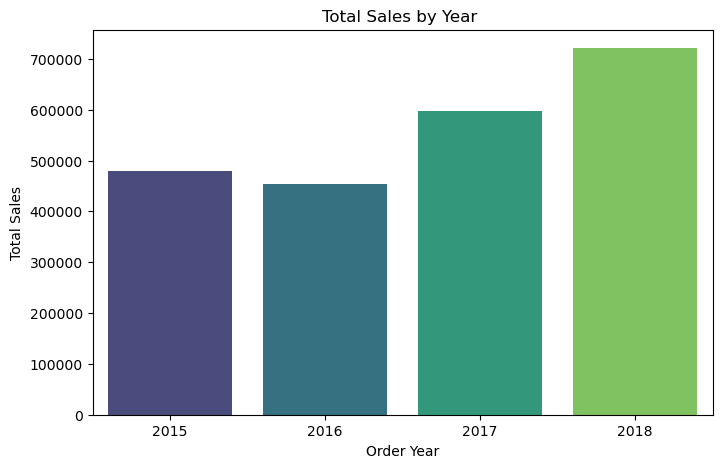

In [14]:
# Sales Analysis

plt.figure(figsize=(8,5))
sns.barplot(x='Order Year', y='Sales', data=df,estimator=sum, errorbar=None, palette='viridis')
plt.title("Total Sales by Year ")
plt.xlabel("Order Year")
plt.ylabel('Total Sales')
plt.savefig('sales_by_year.png')
plt.show()

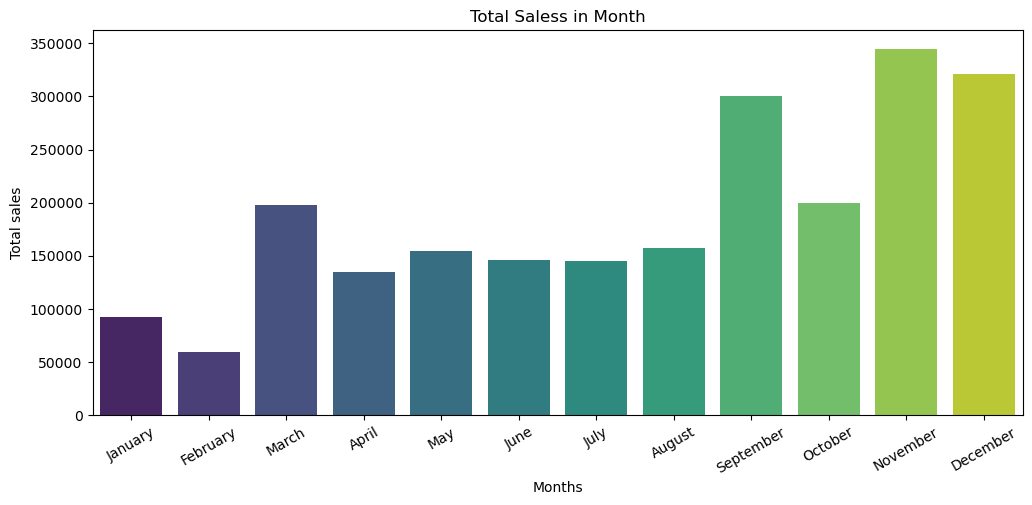

In [15]:
# Slaes analysis by month

plt.figure(figsize=(12,5))
sns.barplot(x="Order Month", y="Sales", data=df,errorbar=None,estimator=sum,palette='viridis' ,order=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.title("Total Saless in Month")
plt.xlabel("Months")
plt.ylabel('Total sales')
plt.xticks(rotation=30)
plt.show()

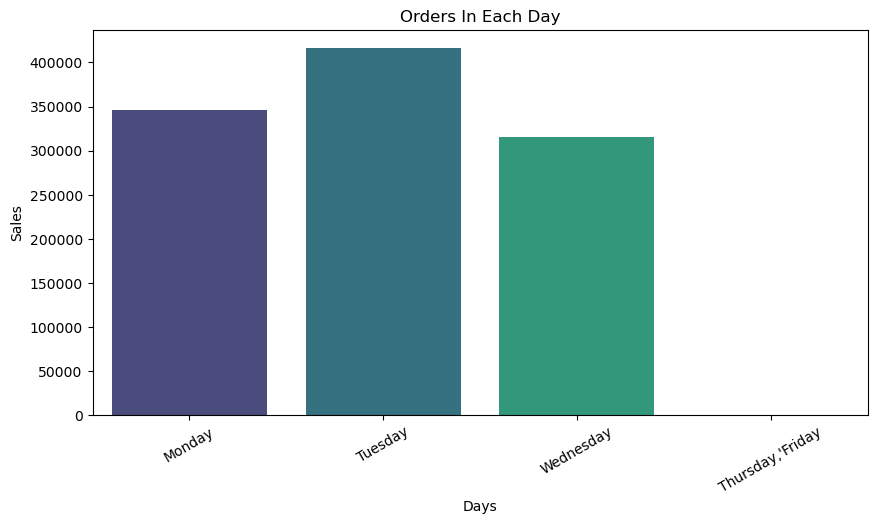

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x='Order Day', y='Sales',data=df, errorbar=None ,estimator=sum, palette='viridis', order=['Monday','Tuesday','Wednesday',"Thursday,'Friday"])
plt.title('Orders In Each Day')
plt.xlabel("Days")
plt.ylabel('Sales')
plt.xticks(rotation=30)
plt.show()

In [31]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month,Order Day,Processing Time
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,November,Wednesday,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,November,Wednesday,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,June,Monday,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,October,Tuesday,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,October,Tuesday,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017,May,Sunday,7
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016,January,Tuesday,5
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016,January,Tuesday,5
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016,January,Tuesday,5


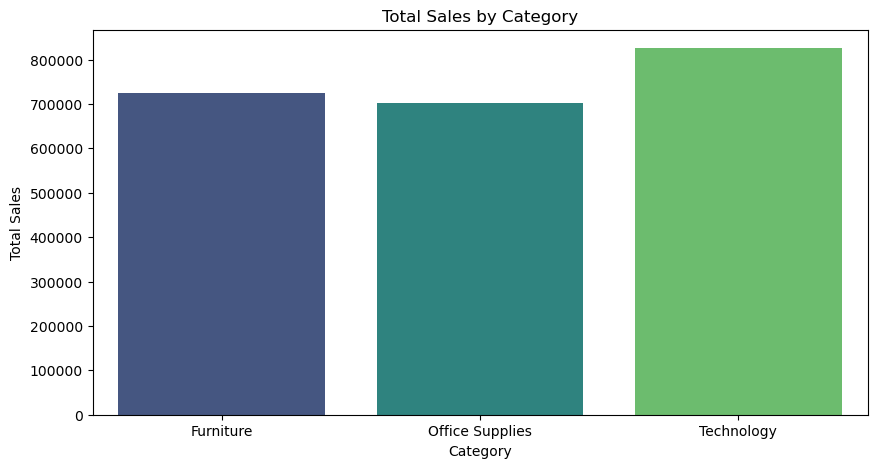

In [33]:
# sales by category
plt.figure(figsize=(10,5))
sns.barplot(x='Category',y="Sales", data=df,estimator=sum, errorbar=None,palette='viridis')
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

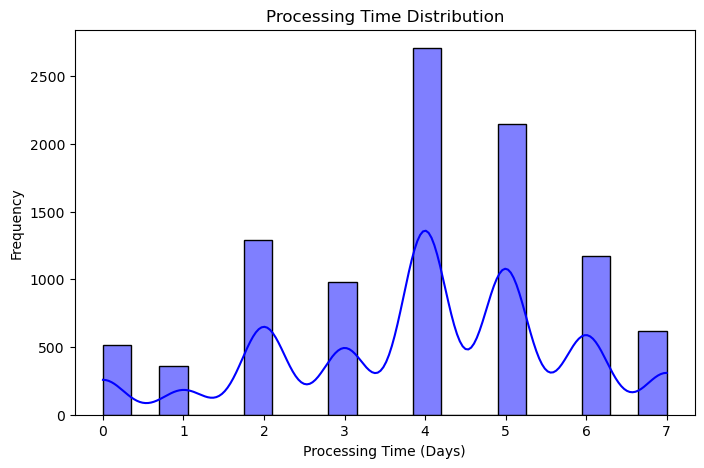

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


plt.figure(figsize=(8,5))
# order process time 
# (Kernel Density Estimate) add smooth curve
sns.histplot(df['Processing Time'], bins=20,color='blue',kde=True)
plt.title("Processing Time Distribution")
plt.xlabel('Processing Time (Days)')
plt.ylabel('Frequency')
plt.show()

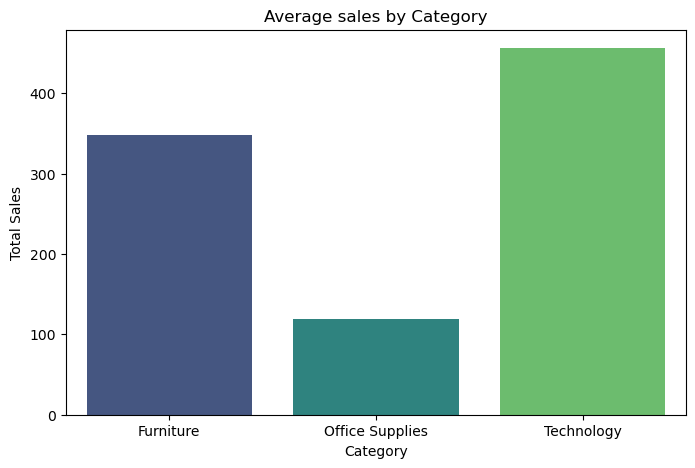

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Sales', data=df, errorbar=None ,palette='viridis')
plt.title("Average sales by Category")
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

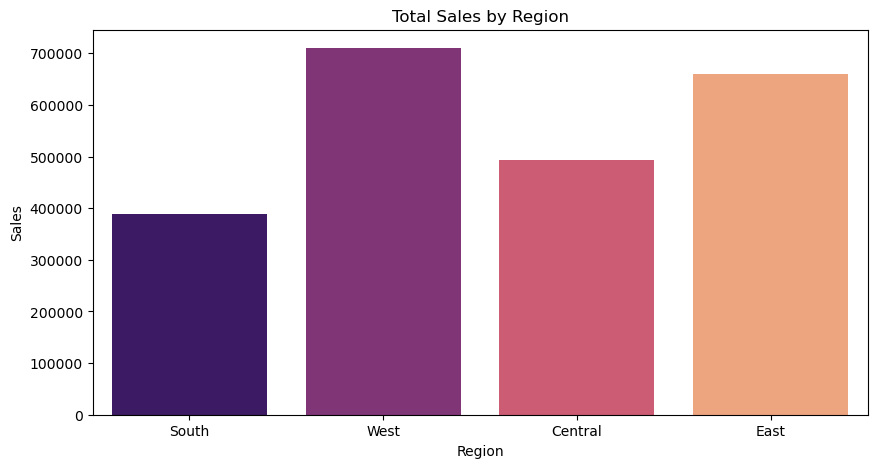

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Region', y='Sales', data=df,errorbar=None, estimator=sum, palette='viridis')
plt.title("Total Sales by Region")
plt.show()



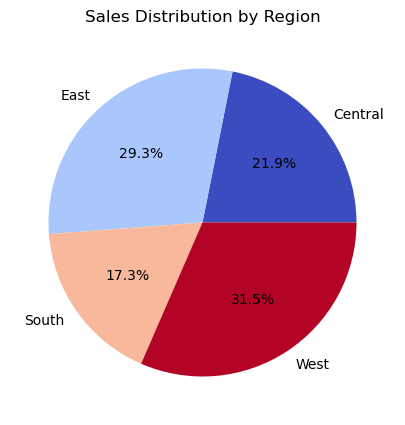

In [40]:
plt.figure(figsize=(10,5))
df.groupby('Region')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%', colormap='coolwarm')
plt.title("Sales Distribution by Region")
plt.ylabel('')
plt.show()


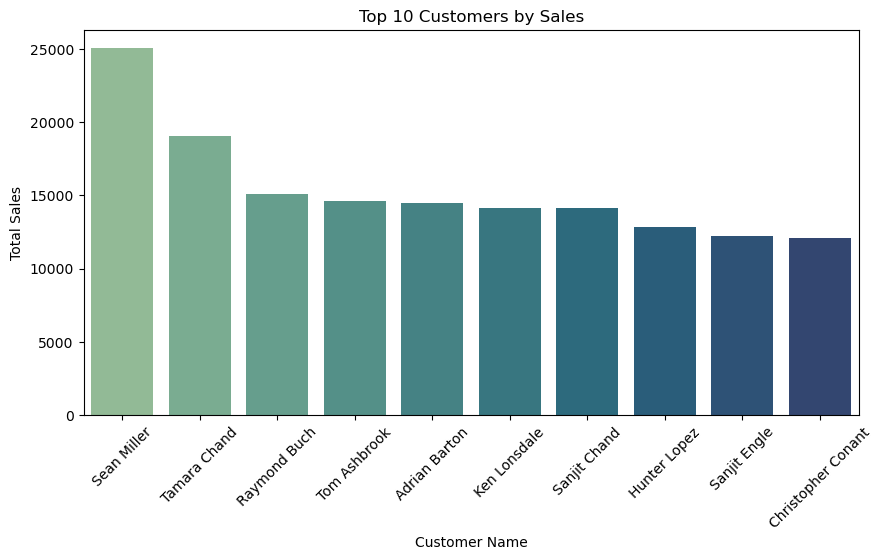

In [41]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='crest')
plt.xticks(rotation=45)
plt.title("Top 10 Customers by Sales")
plt.ylabel("Total Sales")
plt.show()
